In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection

In [2]:
df = pd.read_csv('us_perm_visas.csv', low_memory = False, parse_dates=['decision_date', 'case_received_date'])

In [3]:
df.shape
# (374362, 154)

(374362, 154)

In [4]:
df.head()

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,...,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
0,NaN,NaN,NaN,NaN,PERM,A-07323-97014,NaN,NaT,Certified,J-1,...,NaN,NaN,NaN,IT,75629.0,NaN,yr,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,PERM,A-07332-99439,NaN,NaT,Denied,B-2,...,NaN,NaN,NaN,Other Economic Sector,37024.0,NaN,yr,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,PERM,A-07333-99643,NaN,NaT,Certified,H-1B,...,NaN,NaN,NaN,Aerospace,47923.0,NaN,yr,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,PERM,A-07339-01930,NaN,NaT,Certified,B-2,...,NaN,NaN,NaN,Other Economic Sector,10.97,NaN,hr,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,PERM,A-07345-03565,NaN,NaT,Certified,L-1,...,NaN,NaN,NaN,Advanced Mfg,100000.0,NaN,yr,NaN,NaN,NaN


In [5]:
for l in df.columns:
    dic = {l: df[l].dtype}
    print(dic)

{'add_these_pw_job_title_9089': dtype('O')}
{'agent_city': dtype('O')}
{'agent_firm_name': dtype('O')}
{'agent_state': dtype('O')}
{'application_type': dtype('O')}
{'case_no': dtype('O')}
{'case_number': dtype('O')}
{'case_received_date': dtype('<M8[ns]')}
{'case_status': dtype('O')}
{'class_of_admission': dtype('O')}
{'country_of_citizenship': dtype('O')}
{'country_of_citzenship': dtype('O')}
{'decision_date': dtype('<M8[ns]')}
{'employer_address_1': dtype('O')}
{'employer_address_2': dtype('O')}
{'employer_city': dtype('O')}
{'employer_country': dtype('O')}
{'employer_decl_info_title': dtype('O')}
{'employer_name': dtype('O')}
{'employer_num_employees': dtype('float64')}
{'employer_phone': dtype('O')}
{'employer_phone_ext': dtype('O')}
{'employer_postal_code': dtype('O')}
{'employer_state': dtype('O')}
{'employer_yr_estab': dtype('float64')}
{'foreign_worker_info_alt_edu_experience': dtype('O')}
{'foreign_worker_info_birth_country': dtype('O')}
{'foreign_worker_info_city': dtype('O')

In [6]:
df.describe()

,employer_num_employees,employer_yr_estab,foreign_worker_yr_rel_edu_completed,fw_info_yr_rel_edu_completed,job_info_alt_cmb_ed_oth_yrs,job_info_alt_occ_num_months,job_info_experience_num_months,job_info_training_num_months,wage_offered_from_9089,wage_offered_to_9089
count,2.390130e+05,238958.000000,83364.000000,137198.000000,70220.000000,147200.000000,133188.000000,4779.000000,1.146470e+05,3.101500e+04
mean,2.309387e+04,1984.208267,2001.345761,2002.633603,4.593876,36.483118,33.103560,32.685081,9.588846e+04,1.232273e+05
std,5.453129e+05,38.470555,91.444715,89.674423,4.838582,23.391668,22.733393,20.593288,1.463822e+05,1.080289e+05
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.700000e+00,0.000000e+00
25%,7.300000e+01,1980.000000,2003.000000,2004.000000,3.000000,24.000000,12.000000,12.000000,7.453400e+04,9.700100e+04
50%,1.200000e+03,1996.000000,2006.000000,2007.000000,5.000000,24.000000,24.000000,36.000000,9.064400e+04,1.206000e+05
75%,1.613400e+04,2004.000000,2010.000000,2011.000000,5.000000,60.000000,60.000000,36.000000,1.100000e+05,1.448419e+05
max,2.635506e+08,2016.000000,2103.000000,2207.000000,96.000000,240.000000,244.000000,240.000000,1.629060e+07,1.328500e+07


In [7]:
df['case_status'].value_counts()

Certified            181933
Certified-Expired    148586
Denied                25649
Withdrawn             18194
Name: case_status, dtype: int64

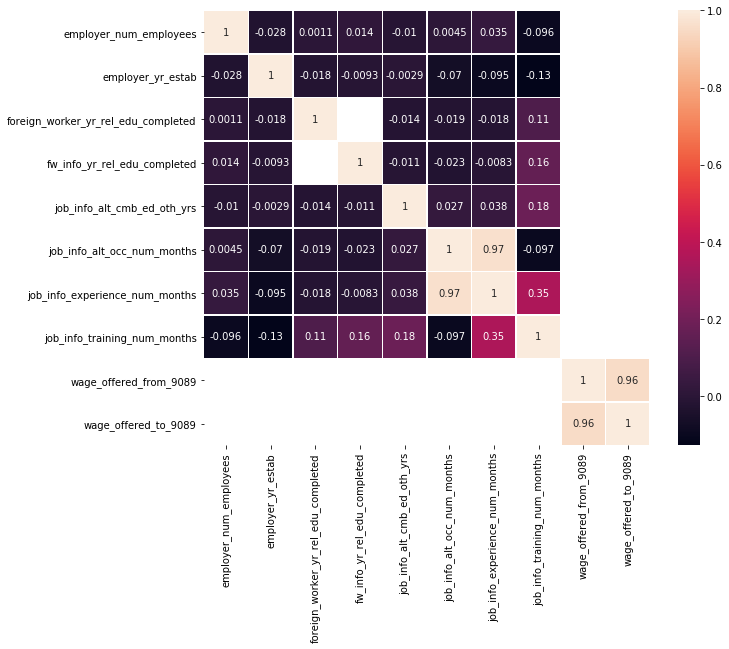

In [8]:
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(10,8))
hm = sns.heatmap(corr_matrix, annot = True, linewidths=.5, ax = ax)

In [7]:
#Based on Correlation, droping columns

del df['job_info_alt_occ_num_months']
del df['foreign_worker_yr_rel_edu_completed']

In [8]:
del df['wage_offered_from_9089']
del df['wage_offered_to_9089']

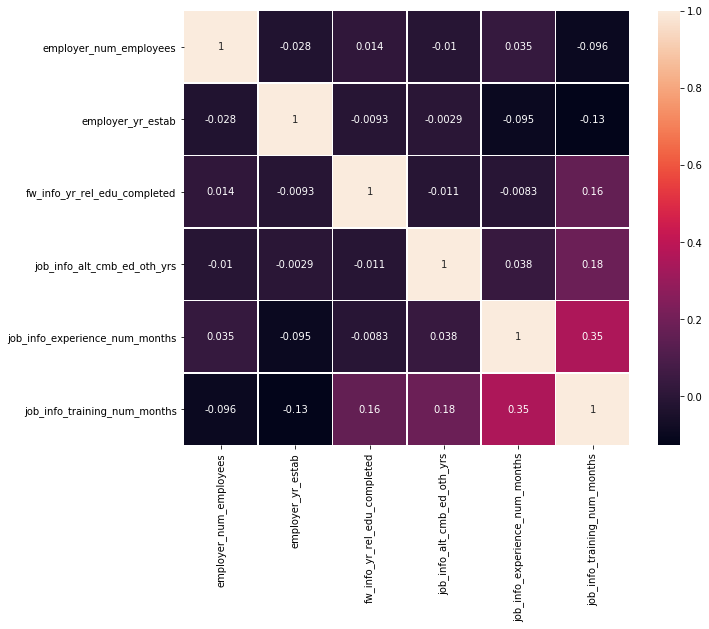

In [11]:
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(10,8))
hm = sns.heatmap(corr_matrix, annot = True, linewidths=.5, ax = ax)

In [12]:
# checking count of NaN

print(len(df),'\n')
print(len(df) - df.count())

374362 

add_these_pw_job_title_9089               332168
agent_city                                162908
agent_firm_name                           167365
agent_state                               166123
application_type                          239093
case_no                                   239093
case_number                               135269
case_received_date                        135271
case_status                                    0
class_of_admission                         22845
country_of_citizenship                     20633
country_of_citzenship                     353788
decision_date                                  0
employer_address_1                            42
employer_address_2                        149193
employer_city                                 14
employer_country                          135343
employer_decl_info_title                  135308
employer_name                                 12
employer_num_employees                    135349
employer_ph

### Preparing Target variable

In [9]:
#droping all the withdrawn status as it wouldn't be useful

df = df.drop(df[df.case_status == 'Withdrawn'].index)
df['case_status'].value_counts()

Certified            181933
Certified-Expired    148586
Denied                25649
Name: case_status, dtype: int64

In [10]:
#Converting the Certified-expired to certified

df.loc[df.case_status == 'Certified-Expired', 'case_status'] = 'Certified'
df['case_status'].value_counts()

Certified    330519
Denied        25649
Name: case_status, dtype: int64

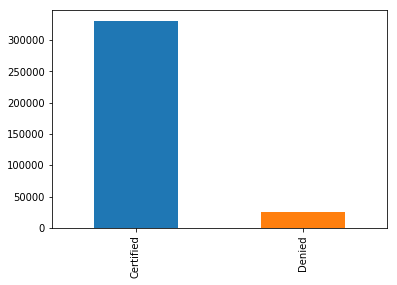

In [11]:
#Total Number of data points of each class
df['case_status'].value_counts().plot(kind = 'bar')

### Checking percent of values in each column as compared to case_status

In [19]:
i = 0;
for col in df.columns:
    i = i+1;
    print (i-1, col, 100*df[col].count()/len(df['case_status']))

0 add_these_pw_job_title_9089 10.988353810561309
1 agent_city 56.915837469958
2 agent_firm_name 55.738303272612924
3 agent_state 56.04770782327441
4 application_type 35.614653758900296
5 case_no 35.614653758900296
6 case_number 64.38534624109971
7 case_received_date 64.38534624109971
8 case_status 100.0
9 class_of_admission 94.08004087958491
10 country_of_citizenship 94.58907032636284
11 country_of_citzenship 5.395487522742076
12 decision_date 100.0
13 employer_address_1 99.9896116439433
14 employer_address_2 60.40464050672716
15 employer_city 99.9971923362009
16 employer_country 64.36513106174614
17 employer_decl_info_title 64.37495788504302
18 employer_name 99.99775386896071
19 employer_num_employees 64.36372722984659
20 employer_phone 64.37551941780283
21 employer_phone_ext 6.316682015228769
22 employer_postal_code 99.99073470946296
23 employer_state 99.9896116439433
24 employer_yr_estab 64.34772354619169
25 foreign_worker_info_alt_edu_experience 23.66439433076526
26 foreign_worker_

In [20]:
#Dropping all empty columns
df = df.dropna(axis=1, how='all');

#Dropping all empty rows
df = df.dropna(axis=0, how='all');

df.shape

(356168, 150)

### Merging 2 attributes that may contain similar information: case_no and case_number
Reason why we are doing this is because the dataset contains 2 different columns and have found instances where there is value present in one column but not in the other so we have found such rows where these instances have occured and have created a new column which has merged values from both the column.

In [21]:
df['case_number'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: case_number, dtype: object

In [22]:
df['case_no'].head()

0    A-07323-97014
1    A-07332-99439
2    A-07333-99643
3    A-07339-01930
4    A-07345-03565
Name: case_no, dtype: object

#### Checking if any values overlap

In [23]:
df[(df['case_number'].notnull()) & (df['case_no'].notnull())][['case_number','case_no']]

,case_number,case_no


#### Checking NA values in same indexes

In [24]:
df[(df['case_number'].isnull()) & (df['case_no'].isnull())][['case_number','case_no']]

,case_number,case_no


In [12]:
df['case_number'] = df['case_number'].fillna(df['case_no'])

In [13]:
df['case_number'].isnull().sum()

0

In [14]:
del df['case_no']

In [10]:
df['case_number'].head()

0    A-07323-97014
1    A-07332-99439
2    A-07333-99643
3    A-07339-01930
4    A-07345-03565
Name: case_number, dtype: object

#### Merging the Values of  country_of_citzenship to country_of_citizenship

In [29]:
df.country_of_citizenship.head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: country_of_citizenship, dtype: object

In [30]:
df.country_of_citzenship.head()

0        ARMENIA
1         POLAND
2          INDIA
3    SOUTH KOREA
4         CANADA
Name: country_of_citzenship, dtype: object

In [31]:
df.shape

(356168, 149)

#### Checking if any values overlap

In [37]:
df[(df['country_of_citzenship'].notnull()) & (df['country_of_citizenship'].notnull())][['country_of_citzenship','country_of_citizenship']]

,country_of_citzenship,country_of_citizenship


#### Checking NA values in same indexes

In [19]:
df[(df['country_of_citzenship'].isnull()) & (df['country_of_citizenship'].isnull())][['country_of_citzenship','country_of_citizenship']].index

Int64Index([ 18713,  19057,  51091,  56115,  58588,  59469,  60550,  60578,
             61169,  61407,  67277, 127622, 128082, 129104, 129733, 130139,
            130211, 130808, 130824, 130827, 131306, 135267, 159693, 179907,
            182384, 196852, 208664, 208733, 208851, 209007, 209143, 209166,
            209243, 209261, 209551, 209721, 223903, 260089, 260782, 261385,
            262137, 266149, 278347, 282940, 287591, 305155, 310278, 319420,
            325662, 330375, 331559, 338836, 345376, 348641, 348642],
           dtype='int64')

In [15]:
df = df[(df['country_of_citzenship'].notnull()) | (df['country_of_citizenship'].notnull())]

In [16]:
df['country_of_citizenship'] = df['country_of_citizenship'].fillna(df['country_of_citzenship'])

In [17]:
df['country_of_citizenship'].isnull().sum()

0

In [18]:
del df['country_of_citzenship']

In [43]:
df['country_of_citizenship'].head()

0        ARMENIA
1         POLAND
2          INDIA
3    SOUTH KOREA
4         CANADA
Name: country_of_citizenship, dtype: object

#### Merging the values of naics_2007_us_code, naics_code, naics_us_code, naics_us_code_2007

In [44]:
df.naics_2007_us_code.head()

0    541512
1    562211
2    541330
3    813110
4    333291
Name: naics_2007_us_code, dtype: object

In [45]:
df.naics_code.head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: naics_code, dtype: object

In [46]:
df.naics_us_code.head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: naics_us_code, dtype: object

In [47]:
df.naics_us_code_2007.head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: naics_us_code_2007, dtype: object

#### Checking if any values overlap

In [52]:
df[(df['naics_2007_us_code'].notnull()) & (df['naics_code'].notnull()) & (df['naics_us_code'].notnull()) & (df['naics_us_code_2007'].notnull())][['naics_2007_us_code','naics_code','naics_us_code','naics_us_code_2007']]

,naics_2007_us_code,naics_code,naics_us_code,naics_us_code_2007


#### Checking NA values in same indexes

In [50]:
df[(df['naics_2007_us_code'].isnull()) & (df['naics_code'].isnull()) & (df['naics_us_code'].isnull()) & (df['naics_us_code_2007'].isnull())][['naics_2007_us_code','naics_code','naics_us_code','naics_us_code_2007']].shape

(939, 4)

In [19]:
df = df[(df['naics_2007_us_code'].notnull()) | (df['naics_code'].notnull()) | (df['naics_us_code'].notnull()) | (df['naics_us_code_2007'].notnull())]

In [20]:
df['naics_code'] = df['naics_code'].fillna(df['naics_2007_us_code'])

In [21]:
del df['naics_2007_us_code']

In [22]:
df['naics_code'] = df['naics_code'].fillna(df['naics_us_code'])

In [23]:
del df['naics_us_code']

In [24]:
df['naics_code'] = df['naics_code'].fillna(df['naics_us_code_2007'])

In [25]:
del df['naics_us_code_2007']

In [31]:
df['naics_code'].isnull().sum()

0

#### Merging the values of naics_2007_us_title, naics_title, naics_us_title, naics_us_title_2007

In [64]:
df.naics_2007_us_title.head()

0          Computer Systems Design Services
1    Hazardous Waste Treatment and Disposal
2                      Engineering Services
3                   Religious Organizations
4    Paper Industry Machinery Manufacturing
Name: naics_2007_us_title, dtype: object

In [65]:
df.naics_title.head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: naics_title, dtype: object

In [66]:
df.naics_us_title.head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: naics_us_title, dtype: object

In [67]:
df.naics_us_title_2007.head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: naics_us_title_2007, dtype: object

#### Checking if any values overlap

In [73]:
df[(df['naics_2007_us_title'].notnull()) & (df['naics_title'].notnull()) & (df['naics_us_title'].notnull()) & (df['naics_us_title_2007'].notnull())][['naics_2007_us_title','naics_title','naics_us_title','naics_us_title_2007']]

,naics_2007_us_title,naics_title,naics_us_title,naics_us_title_2007


#### Checking NA values in same indexes

In [71]:
df[(df['naics_2007_us_title'].isnull()) & (df['naics_title'].isnull()) & (df['naics_us_title'].isnull()) & (df['naics_us_title_2007'].isnull())][['naics_2007_us_title','naics_title','naics_us_title','naics_us_title_2007']].shape

(3559, 4)

In [26]:
df = df[(df['naics_2007_us_title'].notnull()) | (df['naics_title'].notnull()) | (df['naics_us_title'].notnull()) | (df['naics_us_title_2007'].notnull())]

In [27]:
df['naics_title'] = df['naics_title'].fillna(df['naics_2007_us_title'])

In [28]:
del df['naics_2007_us_title']

In [29]:
df['naics_title'] = df['naics_title'].fillna(df['naics_us_title'])

In [30]:
del df['naics_us_title']

In [31]:
df['naics_title'] = df['naics_title'].fillna(df['naics_us_title_2007'])

In [32]:
del df['naics_us_title_2007']

In [33]:
df['naics_title'].isnull().sum()

0

In [40]:
df['naics_title'].head()

0          Computer Systems Design Services
1    Hazardous Waste Treatment and Disposal
2                      Engineering Services
3                   Religious Organizations
4    Paper Industry Machinery Manufacturing
Name: naics_title, dtype: object

### Merging the values of pw_job_title_908 and pw_job_title_9089

In [34]:
df.pw_job_title_908 = df.pw_job_title_908.str.upper()
df.pw_job_title_9089 = df.pw_job_title_9089.str.upper()

In [92]:
df.pw_job_title_908.head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: pw_job_title_908, dtype: object

In [93]:
df.pw_job_title_9089.head()

0    COMPUTER SOFTWARE ENGINEERS, APPLICATIONS
1                             ASBESTOS HANDLER
2                               CIVIL ENGINEER
3                                   FILE CLERK
4                     SALES & SERVICE ENGINEER
Name: pw_job_title_9089, dtype: object

#### Checking if any values overlap

In [96]:
df[(df['pw_job_title_908'].notnull()) & (df['pw_job_title_9089'].notnull())][['pw_job_title_908','pw_job_title_9089']]

,pw_job_title_908,pw_job_title_9089


#### Checking NA values in same indexes

In [35]:
df[(df['pw_job_title_908'].isnull()) & (df['pw_job_title_9089'].isnull())][['pw_job_title_908','pw_job_title_9089']].shape

(89, 2)

In [36]:
df = df[(df['pw_job_title_908'].notnull()) | (df['pw_job_title_9089'].notnull())]

In [37]:
df['pw_job_title_9089'] = df['pw_job_title_9089'].fillna(df['pw_job_title_908'])

In [38]:
del df['pw_job_title_908']

In [39]:
df['pw_job_title_9089'].isnull().sum()

0

### Merging the values of wage_offer_unit_of_pay_9089 and wage_offered_unit_of_pay_9089

In [112]:
df.wage_offer_unit_of_pay_9089.tail()

374349    Year
374350    Year
374351    Year
374352    Year
374353    Year
Name: wage_offer_unit_of_pay_9089, dtype: object

In [105]:
df.wage_offered_unit_of_pay_9089.tail()

374349    NaN
374350    NaN
374351    NaN
374352    NaN
374353    NaN
Name: wage_offered_unit_of_pay_9089, dtype: object

#### Checking if any values overlap

In [114]:
df[(df['wage_offer_unit_of_pay_9089'].notnull()) & (df['wage_offered_unit_of_pay_9089'].notnull())][['wage_offer_unit_of_pay_9089','wage_offered_unit_of_pay_9089']]

,wage_offer_unit_of_pay_9089,wage_offered_unit_of_pay_9089


#### Checking NA values in same indexes

In [46]:
df[(df['wage_offer_unit_of_pay_9089'].isnull()) & (df['wage_offered_unit_of_pay_9089'].isnull())][['wage_offer_unit_of_pay_9089','wage_offered_unit_of_pay_9089']].shape

(38786, 2)

In [40]:
df['wage_offered_unit_of_pay_9089'] = df['wage_offered_unit_of_pay_9089'].fillna(df['wage_offer_unit_of_pay_9089'])

In [41]:
del df['wage_offer_unit_of_pay_9089']

In [42]:
df['wage_offered_unit_of_pay_9089'].isnull().sum()

38786

### #pw_amount_9089

In [43]:
df.pw_amount_9089.isnull().sum()

14

In [57]:
df[['pw_amount_9089','pw_unit_of_pay_9089']].head(10)

,pw_amount_9089,pw_unit_of_pay_9089
0,75629.0,yr
1,37024.0,yr
2,47923.0,yr
3,10.97,hr
4,94890.0,yr
5,37024.0,yr
6,47083.33,yr
7,36733.0,yr
8,44824.0,yr
9,12.86,hr


In [44]:
#Replacing commas with whitespace character
df['pw_amount_9089'] = df['pw_amount_9089'].str.replace(",","") 


#Calculating pw_amount_9089 yearly for every unit
for unit in df.pw_unit_of_pay_9089.unique():
    if unit == "hr" or unit == "Hour":
        df.loc[df['pw_unit_of_pay_9089'] == unit, 'pw_amount_9089'] = df['pw_amount_9089'].apply(lambda x: float(x) * 8 * 250)
        df.loc[df['pw_unit_of_pay_9089'] == unit, 'pw_unit_of_pay_9089'] = df['pw_unit_of_pay_9089'].replace(to_replace = unit, value = "Year") 
    elif unit == "wk" or unit == "Week":
        df.loc[df['pw_unit_of_pay_9089'] == unit, 'pw_amount_9089'] = df['pw_amount_9089'].apply(lambda x: float(x) * 50)
        df.loc[df['pw_unit_of_pay_9089'] == unit, 'pw_unit_of_pay_9089'] = df['pw_unit_of_pay_9089'].replace(to_replace = unit, value = "Year")
    elif unit == "mth" or unit == "Month":
        df.loc[df['pw_unit_of_pay_9089'] == unit, 'pw_amount_9089'] = df['pw_amount_9089'].apply(lambda x: float(x) * 12)
        df.loc[df['pw_unit_of_pay_9089'] == unit, 'pw_unit_of_pay_9089'] = df['pw_unit_of_pay_9089'].replace(to_replace = unit, value = "Year")
    elif unit == "bi" or unit == "Bi-Weekly":  
        df.loc[df['pw_unit_of_pay_9089'] == unit, 'pw_amount_9089'] = df['pw_amount_9089'].apply(lambda x: float(x) * 25)
        df.loc[df['pw_unit_of_pay_9089'] == unit, 'pw_unit_of_pay_9089'] = df['pw_unit_of_pay_9089'].replace(to_replace = unit, value = "Year")
    elif unit =="yr":
         df.loc[df['pw_unit_of_pay_9089'] == unit ,'pw_unit_of_pay_9089'] = df['pw_unit_of_pay_9089'].replace(to_replace = unit, value = "Year")
    else:
        continue
        
#Filling missing values with median 
df['pw_amount_9089'] = df['pw_amount_9089'].fillna((df['pw_amount_9089'].median()))

#Changing format from string to float
df['pw_amount_9089'] = df.pw_amount_9089.astype(float)

#Displaying 10 first values
df[['pw_amount_9089','pw_unit_of_pay_9089']].head(10)

,pw_amount_9089,pw_unit_of_pay_9089
0,75629.00,Year
1,37024.00,Year
2,47923.00,Year
3,21940.00,Year
4,94890.00,Year
5,37024.00,Year
6,47083.33,Year
7,36733.00,Year
8,44824.00,Year
9,25720.00,Year


In [45]:
with pd.option_context('float_format', '{:.2f}'.format): print(df.pw_amount_9089.describe())

count      351526.00
mean       473837.06
std       7722627.27
min             7.50
25%         67642.00
50%         86278.00
75%        105082.00
max     495748000.00
Name: pw_amount_9089, dtype: float64


In [46]:
#Dividing our continuous income values into some categories to facilitate their visualization
df['remuneration'] = pd.cut(df['pw_amount_9089'], [0, 30000, 60000,90000,120000,150000,180000,210000,240000,270000,495748000], right=False, labels=["0-30k", "30-60k","60-90k","90-120k","120-150k","150-180k","180-210k","210-240k","240-270k","270k+"])
salary = df['remuneration'].value_counts()
salary.iloc[np.argsort(salary.index)]

0-30k        19554
30-60k       47076
60-90k      130124
90-120k     111810
120-150k     30356
150-180k      7070
180-210k      3789
210-240k       602
240-270k        28
270k+         1116
Name: remuneration, dtype: int64

### #job_info_job_title

In [47]:
df['job_info_job_title'] = df['job_info_job_title'].str.upper()

In [48]:
#Converting values to upper case
df['job_info_job_title'] = df['job_info_job_title'].str.upper()

#Splitting job titles by '-'
df['job_info_job_title'] = df['job_info_job_title'].astype(str).str.split('-').str[0]
#Splitting job titles by 'ii'
df['job_info_job_title'] = df['job_info_job_title'].astype(str).str.split('ii').str[0]
#Splitting job titles by '/'
df['job_info_job_title'] = df['job_info_job_title'].astype(str).str.split('/').str[0]
#Removing leading and ending spaces
df['job_info_job_title'] = df['job_info_job_title'].astype(str).str.strip()
#Replacing "sr." values with "senior"
df['job_info_job_title'] = df['job_info_job_title'].str.replace('sr.', 'senior')
#Replacing "NaN", "NaT" and "nan" values with np.nan
df['job_info_job_title'].replace(["NaN", 'NaT','nan'], np.nan, inplace = True)


df['job_info_job_title'].value_counts(dropna=True)[:10]

SOFTWARE ENGINEER                   17236
COMPUTER SYSTEMS ANALYST            12023
SENIOR SOFTWARE ENGINEER             4690
SOFTWARE DEVELOPER                   4340
PROGRAMMER ANALYST                   3313
ASSISTANT PROFESSOR                  2867
SYSTEMS ANALYST                      2325
SOFTWARE DEVELOPMENT ENGINEER II     1772
POULTRY PROCESSING WORKER            1596
BUSINESS ANALYST                     1451
Name: job_info_job_title, dtype: int64

In [146]:
lst1 = list(df['job_info_job_title'].value_counts().index)
lst2 = list(df['job_info_job_title'].value_counts().index)

In [148]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(lst1)
print(tfidf_matrix.shape)

(47002, 7500)


In [151]:
tfidf_matrix.data

array([0.8049129 , 0.59339297, 0.72893197, ..., 0.39720626, 0.62218992,
       0.56189107])

In [193]:
#from sklearn.metrics.pairwise import cosine_similarity
#cosine_similarity(tfidf_matrix, tfidf_matrix)

# MemoryError

In [231]:
df['job_info_job_title'].value_counts().values[df['job_info_job_title'].value_counts().values > 300]

array([17236, 12023,  4690,  4340,  3313,  2867,  2325,  1772,  1596,
        1451,  1234,  1153,  1064,  1054,  1043,  1009,   941,   892,
         864,   851,   846,   799,   773,   773,   759,   756,   666,
         661,   607,   579,   575,   569,   568,   566,   562,   559,
         538,   530,   527,   518,   497,   489,   476,   469,   466,
         449,   443,   417,   415,   407,   407,   400,   394,   386,
         386,   383,   375,   374,   371,   368,   365,   359,   357,
         354,   350,   349,   349,   348,   340,   339,   337,   335,
         333,   314,   313,   309,   306,   306,   304,   303],
      dtype=int64)

In [232]:
(303/228722)*100

0.1324752319409589

### Displaying percentage of non-null values for each feature

In [904]:
i = 0;
for col in df.columns:
    i = i+1;
    print (i-1,"Column: '{}'".format(col),"contains ", np.round(100*df[col].count()/len(df['case_status']),decimals=2),"% non-null values" )

0 Column: 'add_these_pw_job_title_9089' contains  10.99 % non-null values
1 Column: 'agent_city' contains  56.92 % non-null values
2 Column: 'agent_firm_name' contains  55.74 % non-null values
3 Column: 'agent_state' contains  56.05 % non-null values
4 Column: 'application_type' contains  35.61 % non-null values
5 Column: 'case_number' contains  100.0 % non-null values
6 Column: 'case_received_date' contains  64.39 % non-null values
7 Column: 'case_status' contains  100.0 % non-null values
8 Column: 'class_of_admission' contains  94.08 % non-null values
9 Column: 'country_of_citizenship' contains  99.98 % non-null values
10 Column: 'decision_date' contains  100.0 % non-null values
11 Column: 'employer_address_1' contains  99.99 % non-null values
12 Column: 'employer_address_2' contains  60.4 % non-null values
13 Column: 'employer_city' contains  100.0 % non-null values
14 Column: 'employer_country' contains  64.37 % non-null values
15 Column: 'employer_decl_info_title' contains  64.37 

### Feature selection and data cleaning

In [55]:
#Leaving columns which have more than 330000 non-missing observations
df2 = df.loc[:,df.count() >= 330000]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351526 entries, 0 to 374353
Data columns (total 21 columns):
case_number               351526 non-null object
case_status               351526 non-null object
class_of_admission        331278 non-null object
country_of_citizenship    351526 non-null object
decision_date             351526 non-null datetime64[ns]
employer_address_1        351498 non-null object
employer_city             351523 non-null object
employer_name             351525 non-null object
employer_postal_code      351509 non-null object
employer_state            351502 non-null object
job_info_work_city        351498 non-null object
job_info_work_state       351497 non-null object
naics_code                351526 non-null object
naics_title               351526 non-null object
pw_amount_9089            351526 non-null float64
pw_job_title_9089         351526 non-null object
pw_soc_code               351448 non-null object
pw_soc_title              351405 non-null objec

### #class_of_admission

In [56]:
df2.class_of_admission.isnull().sum()

20248

In [57]:
#Replacing missing values with mode
df2['class_of_admission'] = df2['class_of_admission'].fillna(df2['class_of_admission'].mode()[0])

C:\Users\Shefali\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [58]:
df2.class_of_admission.isnull().sum()

0

In [59]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351526 entries, 0 to 374353
Data columns (total 21 columns):
case_number               351526 non-null object
case_status               351526 non-null object
class_of_admission        351526 non-null object
country_of_citizenship    351526 non-null object
decision_date             351526 non-null datetime64[ns]
employer_address_1        351498 non-null object
employer_city             351523 non-null object
employer_name             351525 non-null object
employer_postal_code      351509 non-null object
employer_state            351502 non-null object
job_info_work_city        351498 non-null object
job_info_work_state       351497 non-null object
naics_code                351526 non-null object
naics_title               351526 non-null object
pw_amount_9089            351526 non-null float64
pw_job_title_9089         351526 non-null object
pw_soc_code               351448 non-null object
pw_soc_title              351405 non-null objec

### #country_of_citizenship

In [54]:
df2['country_of_citizenship'].isnull().sum()

0

### #decision_date

In [68]:
df2['decision_date'].head()

0   2012-02-01
1   2011-12-21
2   2011-12-01
3   2011-12-01
4   2012-01-26
Name: decision_date, dtype: datetime64[ns]

In [69]:
import datetime as dt

df2['decision_day'] = df2.decision_date.dt.day
df2['decision_month'] = df2.decision_date.dt.month
df2['decision_year'] = df2.decision_date.dt.year
df2['decision_dayofweek'] = df2.decision_date.dt.dayofweek

C:\Users\Shefali\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Shefali\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Shefali\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [70]:
df2['decision_day'] = df2['decision_day'].astype(object)
df2['decision_month'] = df2['decision_month'].astype(object)
df2['decision_year'] = df2['decision_year'].astype(object)
df2['decision_dayofweek'] = df2['decision_dayofweek'].astype(object)

C:\Users\Shefali\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Shefali\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Shefali\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://p

In [71]:
del df2['decision_date']

In [78]:
#np.sort(df2['decision_day'].unique())
#np.sort(df2['decision_month'].unique())
#np.sort(df2['decision_year'].unique())
np.sort(df2['decision_dayofweek'].unique())

array([0, 1, 2, 3, 4, 5, 6], dtype=object)

### #employer_address_1

In [79]:
df2.employer_address_1.str.upper().value_counts()[:10]

211 QUALITY CIRCLE            11882
ONE MICROSOFT WAY              8109
2200 MISSION COLLEGE BLVD.     6141
1600 AMPHITHEATRE PARKWAY      4920
440 TERRY AVE N                3536
170 WEST TASMAN DRIVE          2581
1 INFINITE LOOP                2535
500 ORACLE PARKWAY             2503
6100 TENNYSON PARKWAY          2498
1700 MARKET STREET             2446
Name: employer_address_1, dtype: int64

In [80]:
df2.employer_address_1 = df2.employer_address_1.str.upper()

C:\Users\Shefali\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [81]:
df2.employer_address_1.isnull().sum()

28

In [82]:
df2.employer_address_1 = df2.employer_address_1.fillna(df2.employer_address_1.mode()[0])

In [922]:
df2.employer_address_1.value_counts()

211 QUALITY CIRCLE                     11931
ONE MICROSOFT WAY                       8123
2200 MISSION COLLEGE BLVD.              6146
1600 AMPHITHEATRE PARKWAY               5061
440 TERRY AVE N                         3536
170 WEST TASMAN DRIVE                   2592
1 INFINITE LOOP                         2535
500 ORACLE PARKWAY                      2523
6100 TENNYSON PARKWAY                   2498
1700 MARKET STREET                      2446
5775 MOREHOUSE DRIVE                    2104
1 HACKER WAY                            1579
330 POTRERO AVENUE                      1466
701 FIRST AVENUE                        1414
200 PLAZA DRIVE                         1315
2 TOWER CENTER BLVD.                    1061
10 SOUTH DEARBORN STREET                1045
100 N. TRYON STREET                     1045
3039 CORNWALLIS ROAD                    1036
3401 HILLVIEW AVENUE                     957
5300 CALIFORNIA AVENUE                   932
6400 SHAFER COURT                        866
2065 HAMIL

### #employer_city

In [83]:
df2.employer_city.isnull().sum()

3

In [84]:
df2.employer_city = df2.employer_city.fillna(df2.employer_city.mode()[0])

In [85]:
df2.employer_city = df2.employer_city.str.upper()

### #employer_name

In [86]:
df2.employer_name.isnull().sum()

1

In [87]:
df2.employer_name = df2.employer_name.str.upper()

In [88]:
df2.employer_name = df2.employer_name.fillna(df2.employer_name.mode()[0])

### #employer_postal_code

In [89]:
df2.employer_postal_code.isnull().sum()

17

In [90]:
del df2['employer_postal_code']

### #employer_state

In [91]:
df2.employer_state.isnull().sum()

24

In [92]:
#Filling missing values in "employer_state" column with mode
df2['employer_state'] = df2['employer_state'].fillna(df2['employer_state'].mode()[0]);

#Mapping from state name to abbreviation
state_abbrevs = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
    'Northern Mariana Islands':'MP', 
    'Palau': 'PW', 
    'Puerto Rico': 'PR', 
    'Virgin Islands': 'VI', 
    'District of Columbia': 'DC'
}

#Capitalizing Keys
us_state_abbrev = {k.upper(): v for k, v in state_abbrevs.items()}
df2['employer_state'].replace(us_state_abbrev, inplace=True)
df2.employer_state = df2.employer_state.astype(str)

C:\Users\Shefali\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Shefali\Anaconda3\lib\site-packages\pandas\core\generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [93]:
df2['employer_state'].head()

0    NY
1    NY
2    VA
3    NY
4    NY
Name: employer_state, dtype: object

In [95]:
df2.employer_state.value_counts()[:10]

CA    87707
TX    42780
NJ    28248
NY    26422
WA    16381
IL    15247
MA    12491
MI    11424
PA    11316
VA    11183
Name: employer_state, dtype: int64

### #job_info_work_city

In [96]:
df2.job_info_work_city.isnull().sum()

28

In [97]:
df2.job_info_work_city.str.upper().value_counts()[:10]

NEW YORK           17600
COLLEGE STATION    10963
SAN JOSE            8306
REDMOND             7888
HOUSTON             7591
SAN FRANCISCO       7003
MOUNTAIN VIEW       6548
SANTA CLARA         5785
SUNNYVALE           5266
SEATTLE             5159
Name: job_info_work_city, dtype: int64

In [98]:
df2.job_info_work_city = df2.job_info_work_city.str.upper()

In [99]:
df2.job_info_work_city = df2.job_info_work_city.fillna(df2.job_info_work_city.mode()[0])

### #job_info_work_state

In [100]:
df2.job_info_work_state.isnull().sum()

29

In [101]:
df2.job_info_work_state = df2.job_info_work_state.fillna(df2.job_info_work_state.mode()[0])

In [102]:
df2['job_info_work_state'].replace(us_state_abbrev, inplace=True)
df2.job_info_work_state = df2.job_info_work_state.astype(str)

In [103]:
df2.job_info_work_state.isnull().sum()

0

In [104]:
df2.job_info_work_state.value_counts()[:10]

CA    81837
TX    43748
NJ    28440
NY    27673
WA    16423
IL    14564
MA    12091
VA    11757
FL    11464
MI    11227
Name: job_info_work_state, dtype: int64

### #naics_code

In [105]:
df2.naics_code.isnull().sum()

0

In [106]:
df2.naics_code = df2.naics_code.fillna(df2.naics_code.mode()[0])

In [107]:
del df2['naics_code']

### #naics_title

In [108]:
df2.naics_title.isnull().sum()

0

In [109]:
df2.naics_title = df2.naics_title.fillna(df2.naics_title.mode()[0])

In [110]:
df2.naics_title = df2.naics_title.str.upper()

In [112]:
df2.naics_title.value_counts()[:10]

CUSTOM COMPUTER PROGRAMMING SERVICES                          73922
COMPUTER SYSTEMS DESIGN SERVICES                              29959
SOFTWARE PUBLISHERS                                           15039
COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS              12941
COMPUTER SYSTEMS DESIGN AND RELATED SERVICES                   9884
OTHER COMPUTER RELATED SERVICES                                9027
SEMICONDUCTOR AND OTHER ELECTRONIC COMPONENT MANUFACTURING     8771
ENGINEERING SERVICES                                           8368
POULTRY PROCESSING                                             6031
ELECTRONIC COMPUTER MANUFACTURING                              5849
Name: naics_title, dtype: int64

### #pw_job_title_9089

In [113]:
df2.pw_job_title_9089.isnull().sum()

0

In [114]:
del df2['pw_job_title_9089']

### #pw_level_9089

In [116]:
#df2.pw_level_9089.isnull().sum()

In [957]:
df2.pw_level_9089.value_counts()

Level II     114192
Level IV      92501
Level III     61681
Level I       61209
Name: pw_level_9089, dtype: int64

In [958]:
df2.pw_level_9089 = df2.pw_level_9089.fillna(df2.pw_level_9089.mode()[0])

### #pw_soc_code

In [117]:
df2.pw_soc_code.isnull().sum()

78

In [118]:
df2['pw_soc_code'] = df2['pw_soc_code'].str.replace('.','')
df2['pw_soc_code'] = df2['pw_soc_code'].str.replace('-','')
df2['pw_soc_code'] = df2['pw_soc_code'].astype(str).str[0:6]

C:\Users\Shefali\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Shefali\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Shefali\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://p

In [119]:
del df2['pw_soc_code']

### #pw_soc_title

In [120]:
df2.pw_soc_title.isnull().sum()

121

In [121]:
df2.pw_soc_title.value_counts()[:10]

Software Developers, Applications               109993
Computer Systems Analysts                        35119
Software Developers, Systems Software            20397
Electronics Engineers, Except Computer           12466
Computer and Information Systems Managers         9152
Accountants and Auditors                          5758
Computer Software Engineers, Applications         5749
Network and Computer Systems Administrators*      5682
Mechanical Engineers                              4993
Meat, Poultry, and Fish Cutters and Trimmers      4650
Name: pw_soc_title, dtype: int64

In [122]:
del df2['pw_soc_title']

### #pw_source_name_9089

In [123]:
df2.pw_source_name_9089.isnull().sum()

27

In [124]:
df2.pw_source_name_9089 = df2.pw_source_name_9089.fillna(df2.pw_source_name_9089.mode()[0])

In [125]:
df2.pw_source_name_9089.value_counts()

OES                   322897
Other                  24456
CBA                     3636
Employer Conducted       449
SCA                       67
DBA                       21
Name: pw_source_name_9089, dtype: int64

### #pw_unit_of_pay_9089

In [126]:
df2.pw_unit_of_pay_9089.isnull().sum()

1045

In [127]:
df2.pw_unit_of_pay_9089.value_counts()

Year    350481
Name: pw_unit_of_pay_9089, dtype: int64

In [128]:
del df2['pw_unit_of_pay_9089']

### #wage_offered_unit_of_pay_9089

In [130]:
#df2.wage_offered_unit_of_pay_9089.isnull().sum()

In [132]:
#df2.wage_offered_unit_of_pay_9089.value_counts()

In [975]:
for unit in df2.wage_offered_unit_of_pay_9089.unique():
    if unit == "hr":
        df2.loc[df2['wage_offered_unit_of_pay_9089'] == unit, 'wage_offered_unit_of_pay_9089'] = "Hour" 
    elif unit == "wk":
        df2.loc[df2['wage_offered_unit_of_pay_9089'] == unit, 'wage_offered_unit_of_pay_9089'] = "Week"
    elif unit == "mth":
        df2.loc[df2['wage_offered_unit_of_pay_9089'] == unit, 'wage_offered_unit_of_pay_9089'] = "Month"
    elif unit == "bi":  
        df2.loc[df2['wage_offered_unit_of_pay_9089'] == unit, 'wage_offered_unit_of_pay_9089'] = "Bi-Weekly"
    elif unit == "yr":
        df2.loc[df2['wage_offered_unit_of_pay_9089'] == unit, 'wage_offered_unit_of_pay_9089'] = "Year"
    else:
        continue

C:\Users\Shefali\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [976]:
df2.wage_offered_unit_of_pay_9089 = df2.wage_offered_unit_of_pay_9089.fillna(df2.wage_offered_unit_of_pay_9089.mode()[0])

In [977]:
df2.wage_offered_unit_of_pay_9089.value_counts()

Year         347193
Hour           8591
Week            218
Month           138
Bi-Weekly        28
Name: wage_offered_unit_of_pay_9089, dtype: int64

### #remuneration

In [133]:
df2.remuneration.isnull().sum()

1

In [134]:
df2.remuneration = df2.remuneration.fillna(df2.remuneration.mode()[0])

In [135]:
##############################################################################################################################################

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351526 entries, 0 to 374353
Data columns (total 18 columns):
case_number               351526 non-null object
case_status               351526 non-null object
class_of_admission        351526 non-null object
country_of_citizenship    351526 non-null object
employer_address_1        351526 non-null object
employer_city             351526 non-null object
employer_name             351526 non-null object
employer_state            351526 non-null object
job_info_work_city        351526 non-null object
job_info_work_state       351526 non-null object
naics_title               351526 non-null object
pw_amount_9089            351526 non-null float64
pw_source_name_9089       351526 non-null object
remuneration              351526 non-null category
decision_day              351526 non-null object
decision_month            351526 non-null object
decision_year             351526 non-null object
decision_dayofweek        351526 non-null object
dtyp

## Data type conversion

In [136]:
df3 = df2.copy()

In [137]:
from sklearn.preprocessing import LabelEncoder
categorical_variables = {}

#Creating categories denoted by integers from column values
for col in df3.columns:
    cat_var_name = "cat_"+ col
    cat_var_name = LabelEncoder()
    cat_var_name.fit(df3[col])
    df3[col] = cat_var_name.transform(df3[col])
    categorical_variables[col] = cat_var_name

df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351526 entries, 0 to 374353
Data columns (total 18 columns):
case_number               351526 non-null int32
case_status               351526 non-null int32
class_of_admission        351526 non-null int32
country_of_citizenship    351526 non-null int32
employer_address_1        351526 non-null int32
employer_city             351526 non-null int32
employer_name             351526 non-null int32
employer_state            351526 non-null int32
job_info_work_city        351526 non-null int32
job_info_work_state       351526 non-null int32
naics_title               351526 non-null int32
pw_amount_9089            351526 non-null int64
pw_source_name_9089       351526 non-null int32
remuneration              351526 non-null int32
decision_day              351526 non-null int32
decision_month            351526 non-null int32
decision_year             351526 non-null int32
decision_dayofweek        351526 non-null int32
dtypes: int32(17), int64(

## Applying Tree-based models

In [138]:
#Dividing our final dataset into features(explanatory variables) and labels(target variable)
X = df3.loc[:, df3.columns != 'case_status']
y = df3.case_status

print("The shape of X is: {}".format(X.shape))
print("The shape of y is: {}".format(y.shape))

The shape of X is: (351526, 17)
The shape of y is: (351526,)


In [139]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(246068, 17) (246068,)
(105458, 17) (105458,)


### Random Forest

In [275]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)

rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [277]:
y_pred = rf.predict(X_test)

In [278]:
train_pred = rf.predict(X_train)

In [279]:
pd.crosstab(y_test, y_pred, rownames=['Actual Result'], colnames=['Predicted Result'])

Predicted Result,0,1
Actual Result,,
0,98249,355
1,4572,2282


In [280]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score

accuracy_score(y_test, y_pred)

0.9532799787593165

In [281]:
accuracy_score(y_train, train_pred)

0.9999878082481265

In [282]:
confusion_matrix(y_test, y_pred)

array([[98249,   355],
       [ 4572,  2282]], dtype=int64)

In [283]:
recall_score(y_test, y_pred)

0.3329442661219726

In [284]:
recall_score(y_train, train_pred)

0.9998149176383491

In [285]:
print("Random Forest Classifier: ",accuracy_score(y_test, y_pred))
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
print("Roc/auc: ",roc_auc_score(y_test, y_pred))

Random Forest Classifier:  0.9532799787593165
Roc/auc:  0.6646720032488083


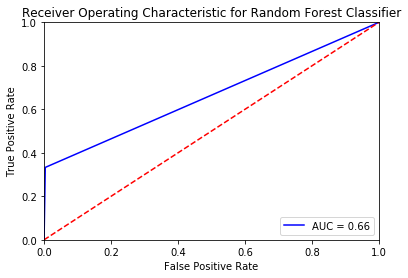

In [293]:
# Plotting the roc curve

plt.title('Receiver Operating Characteristic for Random Forest Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_score(y_test, y_pred))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Applying SMOTE

In [294]:
from imblearn.over_sampling import SMOTE

y_train.value_counts()

0    229859
1     16209
Name: case_status, dtype: int64

In [295]:
smt = SMOTE()
X_train_smt, y_train_smt = smt.fit_sample(X_train, y_train)

In [296]:
np.bincount(y_train_smt)

array([229859, 229859], dtype=int64)

In [297]:
rf.fit(X_train_smt, y_train_smt)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [298]:
y_pred = rf.predict(X_test)

In [299]:
train_pred = rf.predict(X_train)

In [300]:
pd.crosstab(y_test, y_pred, rownames=['Actual Result'], colnames=['Predicted Result'])

Predicted Result,0,1
Actual Result,,
0,95437,3167
1,3778,3076


In [301]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score

accuracy_score(y_test, y_pred)

0.9341443987179731

In [302]:
accuracy_score(y_train, train_pred)

0.9999918721654177

In [303]:
confusion_matrix(y_test, y_pred)

array([[95437,  3167],
       [ 3778,  3076]], dtype=int64)

In [304]:
recall_score(y_test, y_pred)

0.4487890283046396

In [305]:
recall_score(y_train, train_pred)

0.9999383058794497

In [306]:
print("Random Forest Classifier with SMOTE: ",accuracy_score(y_test, y_pred))
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
print("Roc/auc: ",roc_auc_score(y_test, y_pred))

Random Forest Classifier with SMOTE:  0.9341443987179731
Roc/auc:  0.7083353279124106


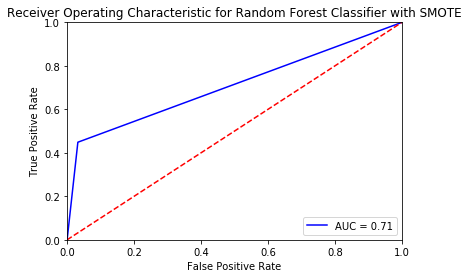

In [307]:
# Plotting the roc curve

plt.title('Receiver Operating Characteristic for Random Forest Classifier with SMOTE')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_score(y_test, y_pred))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Applying NearMiss

In [308]:
from imblearn.under_sampling import NearMiss

y_train.value_counts()

0    229859
1     16209
Name: case_status, dtype: int64

In [309]:
nr = NearMiss()
X_train_nr, y_train_nr = nr.fit_sample(X_train, y_train)

In [188]:
np.bincount(y_train_nr)

array([16209, 16209], dtype=int64)

In [310]:
rf.fit(X_train_nr, y_train_nr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [311]:
y_pred = rf.predict(X_test)

In [312]:
train_pred = rf.predict(X_train)

In [313]:
pd.crosstab(y_test, y_pred, rownames=['Actual Result'], colnames=['Predicted Result'])

Predicted Result,0,1
Actual Result,,
0,31339,67265
1,735,6119


In [314]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score

accuracy_score(y_test, y_pred)

0.35519353676345083

In [315]:
accuracy_score(y_train, train_pred)

0.3711535022839215

In [316]:
confusion_matrix(y_test, y_pred)

array([[31339, 67265],
       [  735,  6119]], dtype=int64)

In [317]:
recall_score(y_test, y_pred)

0.8927633498686898

In [318]:
recall_score(y_train, train_pred)

1.0

In [319]:
print("Random Forest Classifier with NearMiss: ",accuracy_score(y_test, y_pred))
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
print("Roc/auc: ",roc_auc_score(y_test, y_pred))

Random Forest Classifier with NearMiss:  0.35519353676345083
Roc/auc:  0.6052951064381378


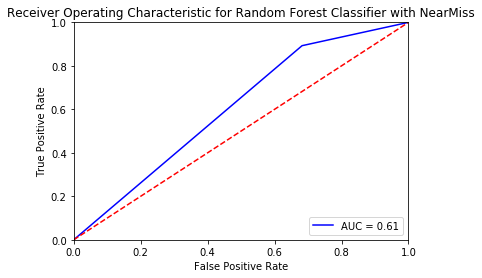

In [320]:
# Plotting the roc curve

plt.title('Receiver Operating Characteristic for Random Forest Classifier with NearMiss')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_score(y_test, y_pred))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Decision Tree

In [321]:
from sklearn import tree

dc = tree.DecisionTreeClassifier(criterion='gini')

In [322]:
dc.fit(X_train, y_train)
dc.score(X_train, y_train)

1.0

In [323]:
y_pred = dc.predict(X_test)

In [324]:
train_pred = dc.predict(X_train)

In [325]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score

accuracy_score(y_test, y_pred)

0.9269377382465057

In [326]:
accuracy_score(y_train, train_pred)

1.0

In [327]:
confusion_matrix(y_test, y_pred)

array([[94398,  4206],
       [ 3499,  3355]], dtype=int64)

In [328]:
recall_score(y_test, y_pred)

0.4894951852932594

In [329]:
recall_score(y_train, train_pred)

1.0

In [330]:
print("Decision Tree Classifier: ",accuracy_score(y_test, y_pred))
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
print("Roc/auc: ",roc_auc_score(y_test, y_pred))

Decision Tree Classifier:  0.9269377382465057
Roc/auc:  0.7234198574634727


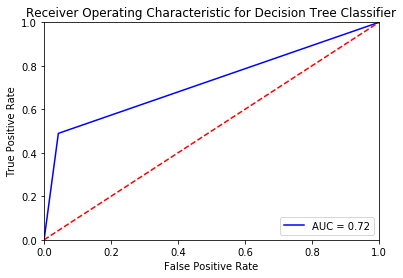

In [336]:
# Plotting the roc curve

plt.title('Receiver Operating Characteristic for Decision Tree Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_score(y_test, y_pred))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Applying SMOTE on DT

In [332]:
from imblearn.over_sampling import SMOTE

y_train.value_counts()

0    229859
1     16209
Name: case_status, dtype: int64

In [333]:
smt = SMOTE()
X_train_smt, y_train_smt = smt.fit_sample(X_train, y_train)

In [334]:
np.bincount(y_train_smt)

array([229859, 229859], dtype=int64)

In [335]:
dc.fit(X_train_smt, y_train_smt)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [337]:
y_pred = dc.predict(X_test)

In [338]:
train_pred = dc.predict(X_train)

In [339]:
pd.crosstab(y_test, y_pred, rownames=['Actual Result'], colnames=['Predicted Result'])

Predicted Result,0,1
Actual Result,,
0,89447,9157
1,3474,3380


In [340]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score

accuracy_score(y_test, y_pred)

0.880227199453811

In [341]:
accuracy_score(y_train, train_pred)

1.0

In [342]:
confusion_matrix(y_test, y_pred)

array([[89447,  9157],
       [ 3474,  3380]], dtype=int64)

In [343]:
recall_score(y_test, y_pred)

0.49314269039976655

In [344]:
recall_score(y_train, train_pred)

1.0

In [345]:
print("Decision Tree Classifier with SMOTE: ",accuracy_score(y_test, y_pred))
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
print("Roc/auc: ",roc_auc_score(y_test, y_pred))

Decision Tree Classifier with SMOTE:  0.880227199453811
Roc/auc:  0.7001381376220973


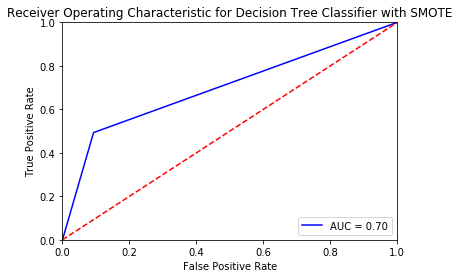

In [347]:
# Plotting the roc curve

plt.title('Receiver Operating Characteristic for Decision Tree Classifier with SMOTE')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_score(y_test, y_pred))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Applying NearMiss

In [348]:
from imblearn.under_sampling import NearMiss

y_train.value_counts()

0    229859
1     16209
Name: case_status, dtype: int64

In [349]:
nr = NearMiss()
X_train_nr, y_train_nr = nr.fit_sample(X_train, y_train)

In [350]:
np.bincount(y_train_nr)

array([16209, 16209], dtype=int64)

In [351]:
dc.fit(X_train_nr, y_train_nr)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [352]:
y_pred = dc.predict(X_test)

In [353]:
train_pred = dc.predict(X_train)

In [354]:
pd.crosstab(y_test, y_pred, rownames=['Actual Result'], colnames=['Predicted Result'])

Predicted Result,0,1
Actual Result,,
0,44352,54252
1,1433,5421


In [355]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score

accuracy_score(y_test, y_pred)

0.47196988374518767

In [356]:
accuracy_score(y_train, train_pred)

0.49765918364029454

In [357]:
confusion_matrix(y_test, y_pred)

array([[44352, 54252],
       [ 1433,  5421]], dtype=int64)

In [358]:
recall_score(y_test, y_pred)

0.7909250072950103

In [359]:
recall_score(y_train, train_pred)

1.0

In [360]:
print("Decision Tree Classifier with NearMiss: ",accuracy_score(y_test, y_pred))
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
print("Roc/auc: ",roc_auc_score(y_test, y_pred))

Decision Tree Classifier with NearMiss:  0.47196988374518767
Roc/auc:  0.6203621020410794


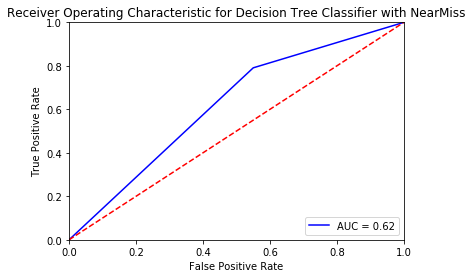

In [361]:
# Plotting the roc curve

plt.title('Receiver Operating Characteristic for Decision Tree Classifier with NearMiss')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_score(y_test, y_pred))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### GradientBoostingClassifier

In [387]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
gb.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [388]:
y_pred = gb.predict(X_test)

In [389]:
train_pred = gb.predict(X_train)

In [390]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score, roc_auc_score,roc_curve

accuracy_score(y_test, y_pred)

0.9402226478787764

In [391]:
accuracy_score(y_train, train_pred)

0.9394395045272038

In [392]:
confusion_matrix(y_test, y_pred)

array([[98148,   456],
       [ 5848,  1006]], dtype=int64)

In [393]:
recall_score(y_test, y_pred)

0.14677560548584767

In [394]:
recall_score(y_train, train_pred)

0.14541304213708434

In [395]:
precision_score(y_test, y_pred)

0.6880984952120383

In [396]:
f1_score(y_test, y_pred)

0.24194324194324193

In [397]:
print("Gradient Boosting Classifier: ",accuracy_score(y_test, y_pred))
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
print("Roc/auc: ",roc_auc_score(y_test, y_pred))

Gradient Boosting Classifier:  0.9402226478787764
Roc/auc:  0.5710755233222107


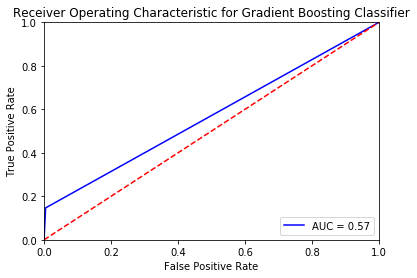

In [398]:
# Plotting the roc curve

plt.title('Receiver Operating Characteristic for Gradient Boosting Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_score(y_test, y_pred))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Applying SMOTE on GB

In [399]:
from imblearn.over_sampling import SMOTE

y_train.value_counts()

0    229859
1     16209
Name: case_status, dtype: int64

In [400]:
smt = SMOTE()
X_train_smt, y_train_smt = smt.fit_sample(X_train, y_train)

In [401]:
np.bincount(y_train_smt)

array([229859, 229859], dtype=int64)

In [402]:
gb.fit(X_train_smt, y_train_smt)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [403]:
y_pred = gb.predict(X_test)

In [404]:
train_pred = gb.predict(X_train)

In [405]:
pd.crosstab(y_test, y_pred, rownames=['Actual Result'], colnames=['Predicted Result'])

Predicted Result,0,1
Actual Result,,
0,84999,13605
1,3292,3562


In [406]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score

accuracy_score(y_test, y_pred)

0.8397750763337063

In [407]:
accuracy_score(y_train, train_pred)

0.8394508834956191

In [408]:
confusion_matrix(y_test, y_pred)

array([[84999, 13605],
       [ 3292,  3562]], dtype=int64)

In [409]:
recall_score(y_test, y_pred)

0.5196965275751386

In [410]:
recall_score(y_train, train_pred)

0.5169967302116109

In [411]:
precision_score(y_test, y_pred)

0.20749111667734607

In [412]:
print("Gradient Boosting Classifier with SMOTE: ",accuracy_score(y_test, y_pred))
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
print("Roc/auc: ",roc_auc_score(y_test, y_pred))

Gradient Boosting Classifier with SMOTE:  0.8397750763337063
Roc/auc:  0.6908601902814235


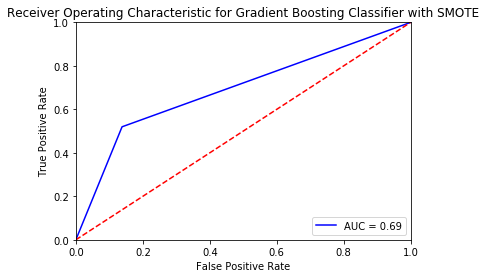

In [414]:
# Plotting the roc curve

plt.title('Receiver Operating Characteristic for Gradient Boosting Classifier with SMOTE')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_score(y_test, y_pred))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Applying NearMiss

In [415]:
from imblearn.under_sampling import NearMiss

y_train.value_counts()

0    229859
1     16209
Name: case_status, dtype: int64

In [416]:
nr = NearMiss()
X_train_nr, y_train_nr = nr.fit_sample(X_train, y_train)

In [417]:
np.bincount(y_train_nr)

array([16209, 16209], dtype=int64)

In [418]:
gb.fit(X_train_nr, y_train_nr)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [419]:
y_pred = gb.predict(X_test)

In [420]:
train_pred = gb.predict(X_train)

In [421]:
pd.crosstab(y_test, y_pred, rownames=['Actual Result'], colnames=['Predicted Result'])

Predicted Result,0,1
Actual Result,,
0,47719,50885
1,1819,5035


In [422]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score

accuracy_score(y_test, y_pred)

0.5002370611997193

In [423]:
accuracy_score(y_train, train_pred)

0.4974275403546987

In [424]:
confusion_matrix(y_test, y_pred)

array([[47719, 50885],
       [ 1819,  5035]], dtype=int64)

In [425]:
recall_score(y_test, y_pred)

0.7346075284505398

In [426]:
recall_score(y_train, train_pred)

0.73465358751311

In [427]:
precision_score(y_test, y_pred)

0.09003934191702433

In [430]:
print("Gradient Boosting Classifier with NearMiss: ",accuracy_score(y_test, y_pred))
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
print("Roc/auc: ",roc_auc_score(y_test, y_pred))

Gradient Boosting Classifier with NearMiss:  0.5002370611997193
Roc/auc:  0.609276706499417


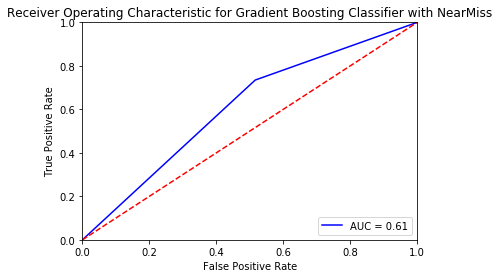

In [431]:
# Plotting the roc curve

plt.title('Receiver Operating Characteristic for Gradient Boosting Classifier with NearMiss')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_score(y_test, y_pred))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()